
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---
## Trabajo práctico entregable - Parte 1

In [81]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [82]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)

In [83]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.



---

*Primero vemos todas las columnas que tiene la base de datos para saber con qué información podemos trabajar*

---


In [84]:
print(df.columns) #Vemos las caracteristicas en analisis

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

---

*Como hay muchas columnas queremos decidir cuáles son las más relevantes para nuestro análisis, entonces empezamos por ver qué tipos de datos contiene cadda una*

---

In [85]:
print("Las caracteristicas (columnas) y los tipos de datos del DataFrame son: ") #Vemos las caracteristicas en analisis
print(df.dtypes)

Las caracteristicas (columnas) y los tipos de datos del DataFrame son: 
work_country                                                                        object
work_province                                                                       object
work_dedication                                                                     object
work_contract_type                                                                  object
salary_monthly_BRUTO                                                               float64
salary_monthly_NETO                                                                float64
numero                                                                                bool
salary_in_usd                                                                       object
salary_last_dollar_value                                                            object
salary_pay_cripto                                                                   object
salary_%_cripto   

---

*Por ejemplo, notamos que la columna* **numero** *contiene booleanos, así que decidimos eliminarla de nuestro análisis. Renombramos ciertas columnas.*

---

In [86]:
print(df.numero.unique()) #Solo contiene booleanos true
del df["numero"]


[ True]


In [87]:
df_renamed = df.rename(columns={ 'Trabajo de': 'work_as', 'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?' : 'work_face_to_face_days_under_hybrid_modality', 'salary_%_cripto' : 'salary_percentage_cripto'})
#Renombramos 3 columnas que no podian usarse como variables por los espacios o simbolos especiales (" ", "%")
print("Las caracteristicas (columnas) y los tipos de datos del DataFrame renombrado son: ") #Vemos las caracteristicas en analisis
print(df_renamed.dtypes)

Las caracteristicas (columnas) y los tipos de datos del DataFrame renombrado son: 
work_country                                     object
work_province                                    object
work_dedication                                  object
work_contract_type                               object
salary_monthly_BRUTO                            float64
salary_monthly_NETO                             float64
salary_in_usd                                    object
salary_last_dollar_value                         object
salary_pay_cripto                                object
salary_percentage_cripto                         object
salary_has_bonus                                 object
salary_bonus_tied_to                             object
salary_inflation_adjustment                      object
salary_percentage_inflation_adjustment           object
salary_month_last_inflation_adjustment           object
salary_comparison_last_semester                   int64
salary_benefit       

---

*Al ser una pregunta abierta hay muchas respuestas distintas bajo la columna specific_work así que decidimos eliminarla también del data frame*

---

In [88]:
for specific_work in df_renamed.work_as.unique():
  print(specific_work) 

del df_renamed["work_as"]


Infosec
Developer
Technical Leader
QA / Tester
Sales / Pre-Sales
Data Engineer
Trainee
SysAdmin / DevOps / SRE
Administrador de Infraestructura
-
HelpDesk
BI Analyst / Data Analyst
Business Analyst
Designer
QA Híbrido (Manual y Automation)
Process Analyst
Soporte local nivel 2 y 3
Desarrollo y Mantenimiento
Manager / Director
Networking
Recruiter / HR
Project Manager
UX Designer
Consultor Atlassian
Analista gestion de cambio
Consultant
Capacitador
Product Manager
MLl engineer
Scrum Master
Middleware
demand manager / delivery manager
Ing. de software y operaciones
Architect
Soporte On Site
Data Scientist
quantitative dev
Help desk + plataformas
mix Consultant - Business Analyst - Technical Leader
Cloud Engineer
Product Owner
Product Marketing Manager
RPA-Developer
Senior Software Engineer
associate
Head of Technology
Pentester (security engineer)
Gerente de Operaciones / Delivery Lead
​Workspace Specialist
DBA
Administrador de Telefonía VOIP
Functional Team Lead
Head of Data & Analytics

---

*Así seguimos analizando el resto de las columnas para decidir cuáles ir eliminando para facilitar el análisis que queremos realizar*

---

In [89]:
print(df_renamed.work_country.unique()) #Solo dice 'Argentina': Eliminado.
del df_renamed["work_country"]

print(df_renamed.work_province.unique()) #Varias provincias. Limpio, lo conservamos
print(df_renamed.work_dedication.unique()) #Dos valores: Full-Time , Part-Time.
print(df_renamed.work_contract_type.unique()) #Printea lo siguiente: ['Staff (planta permanente)' 'Remoto (empresa de otro país)' 'Tercerizado (trabajo a través de consultora o agencia)' 'Freelance' 'Participación societaria en una cooperativa']
print((df_renamed.salary_monthly_BRUTO >= 0).unique())
print((df_renamed.salary_monthly_NETO >= 0).unique())

print(df_renamed.salary_in_usd.unique()) #Printea: [nan 'Cobro todo el salario en dólares' 'Cobro parte del salario en dólares' 'Mi sueldo está dolarizado (pero cobro en moneda local)'].
                                         #Dato sucio? tiene nans, o son los que no quisieron responder esta seccion por no cobrar en dolares?. 
""" COMENTARIO MULTILINEA
salary_in_usd #No se lo puede analizar como BRUTO y NETO porque es tipo objeto, con strings en las respuestas.
print(df_renamed.salary_last_dollar_value.unique()) #Hay NaN, muchos y distintos strings con texto y valores numericos dentro: Eliminado.
"""

print(df_renamed.salary_pay_cripto.unique()) #Tiene 3 valores posibles: [nan 'Cobro todo el salario criptomonedas' 'Cobro parte del salario criptomonedas']. Limpio
print('Cantidad de personas que cobran parte del salario en criptomonedas', ((df_renamed.salary_pay_cripto[df_renamed.salary_pay_cripto == 'Cobro parte del salario criptomonedas'].count()/(df_renamed.shape[0]) )*100).round(2), '%' )
print('Cantidad de personas que cobran todo el salario en criptomonedas', ((df_renamed.salary_pay_cripto[df_renamed.salary_pay_cripto == 'Cobro todo el salario criptomonedas'].count()/(df_renamed.shape[0]) )*100).round(2), '%' )

#print(df_renamed.salary_percentage_cripto.unique()) #Porcentaje del sueldo que recibe en criptomonedas. Hay nan, valores en %, en $, strings, etc. Eliminado??

print(df_renamed.salary_has_bonus.unique()) #Printea: ['No' 'Un sueldo' 'De uno a tres sueldos' 'Menos de un sueldo' '3+ sueldos']. Limpio
#print(df_renamed.salary_bonus_tied_to.unique()) #MUUUUCHOS VALORES STRING MUY DISTINTOS ENTRE SI. No sirve el dato

print(df_renamed.salary_inflation_adjustment.unique()) #Printea: ['No' 'Dos' 'Uno' 'Más de tres' 'Tres']. Limpio
#print(df_renamed.salary_percentage_inflation_adjustment.unique()) #MUCHOS VALORES DISTINTOS. Algunos numericos otros en letras (pocos). Se usa?? Para mi q no. Sirve el dato?
#print(df_renamed.salary_month_last_inflation_adjustment.unique()) #Ultimo mes en el que tuvieron ajuste por inflacion. No sirve creo. Printea: ['No tuve' 'Marzo' 'Febrero' 'Junio' 'Mayo' 'Abril' 'Julio' 'Enero']
#print(df_renamed.salary_benefit.unique()) #Dice los beneficios que le da la empresa, no interesa para el analisis

print(df_renamed.salary_satisfaction.unique()) #Nivel de satisfaccion con el salario? Printea: [2 4 1 3]
print(df_renamed.profile_years_experience.unique()) #Años de experiencia. Datos numericos limpios.
print(df_renamed.work_years_in_company.unique()) #Años en la compania actual. Datos numericos limpios.

#
#Podriamos analizar si esta correcto lo que respondieron viendo que los años en la compañia no sea mayor a los años de experiencia?
#

print(df_renamed.work_years_in_current_position.unique()) #Años en la posicion actual. Dato numerico limpio.

#
#Podriamos analizar si esta correcto lo que respondieron viendo que los años en el puesto actual no sea mayor a los años en la empresa
#

print('Cantidad de personas que tiene a cargo: ', df_renamed.work_people_in_charge_of.unique()) #Cantidad de personas que tiene a cargo. Tiene que ver con el puesto que tiene (Empleado/JefE/Gerente ponele). Dato numerico limpio.

#print(df_renamed.tools_platform.unique()) #Plataformas de programacion. MUCHOS STRINGS, MUY DISTINTOS. No sirve para el analisis.? Se podria limpiar pero se hace laaargo
print(df_renamed.tools_programming_languages.unique()) #Lenguajes de programacion, a analizar. Dato sucio a limpiar.

#print(df_renamed.tools_frameworks.unique()) #Frameworks. MUCHOS STRINGS, MUY DISTINTOS. No sirve para el analisis.? Se podria limpiar pero se hace laaargo

#print(df_renamed.tools_data_bases.unique()) #Herramientas para tratamiento de BDD. No sirve.

#print(df_renamed.tools_qa_testing.unique()) #Testeo de BDD. No sirve.

print(df_renamed.company_employee_number.unique()) #Cantidad de empleados en las empresas. Dato limpio, bien clasificado. Puede servir para tamaño de la empresa.

print(df_renamed.work_work_modality.unique()) #Printea: ['100% remoto' 'Híbrido (presencial y remoto)' '100% presencial']. Dato limpio, bien clasificado
print(df_renamed.work_face_to_face_days_under_hybrid_modality.unique()) #Cantidad de dias presenciales de ls que trabajan hibrido. Printea: [0 4 5 3 1 2]. Dato limpio.

print(df_renamed.company_recommended.unique()) #Recomendacion que le daria a las personas para trabajar en la empresa. Printea: [ 8 10  5  0  7  9  6  4  3  2  1]. Dato limpio. Se puede usar para ver el nivel de satisfaccion.
print(df_renamed.profile_studies_level.unique()) #Maximo nivel de estudio alcanzado. Printea: ['Universitario' nan 'Terciario' 'Secundario' 'Posgrado/Especialización' 'Maestría' 'Doctorado' 'Posdoctorado']. Dato sucio, tiene nans. Sirve para analisis.
print(df_renamed.profile_studies_level_state.unique()) #Estado del nivel de estudios. Printea: ['Completo' nan 'Incompleto' 'En curso']. Dato sucio, tiene nans. Se lo puede usar.

#print(df_renamed.profile_career.unique()) #Muchas carreras distintas. Mucho trabajo recategorizar. Ademas no sirve para el analisis
#print(df_renamed.profile_university.unique()) #Universidad donde estudian/estudiaron, muuuuchas.

#print(df_renamed.profile_boot_camp.unique()) #No sirve, muuchos bootcamp distintos.
#print(df_renamed.profile_boot_camp_carrer.unique()) #No sire, todas las carreras de bootcamp tienen nombre parecidos y son distintos.

print(df_renamed.work_on_call_duty.unique()) #Si tiene guardias en su trabajo. Printea: [nan 'No' 'Sí, activa' 'Sí, pasiva']. Dato sucio, tiene nans. Se puede limpair y usar para clasificar a los que trabajan en compañoa y los que trbajan por encargo. 
print(df_renamed.salary_on_call_duty_charge.unique()) #Cuanto cobra por guardia. Tiene nans, y muchos valores numericos. Dato sucio, tiene nans. Se puede limpiar, no se para que se usaria.
print(df_renamed.work_on_call_duty_charge_type.unique()) #No entiendo que es esto. [nan 'Porcentaje de mi sueldo bruto' 'Bruto' 'Neto']. Dato sucion hay nans.

print(df_renamed.profile_age.unique()) #Edad. Valores numericos. Datos limpios, sin nans.
print(df_renamed.profile_gender.unique()) #Genero, hay que recategorizar para simplificar el analisis de acuerdo al foco que queramos hacer.

['Argentina']
['Catamarca' 'Chaco' 'Chubut' 'Ciudad Autónoma de Buenos Aires' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Provincia de Buenos Aires' 'Río Negro'
 'Salta' 'San Juan' 'San Luis' 'Santa Cruz' 'Santa Fe'
 'Santiago del Estero' 'Tierra del Fuego' 'Tucumán']
['Full-Time' 'Part-Time']
['Staff (planta permanente)' 'Remoto (empresa de otro país)'
 'Tercerizado (trabajo a través de consultora o agencia)' 'Freelance'
 'Participación societaria en una cooperativa']
[ True]
[ True]
[nan 'Cobro todo el salario en dólares'
 'Cobro parte del salario en dólares'
 'Mi sueldo está dolarizado (pero cobro en moneda local)']
[nan 'Cobro todo el salario criptomonedas'
 'Cobro parte del salario criptomonedas']
Cantidad de personas que cobran parte del salario en criptomonedas 1.14 %
Cantidad de personas que cobran todo el salario en criptomonedas 1.87 %
['No' 'Un sueldo' 'De uno a tres sueldos' 'Menos de un sueldo'
 '3+ sueldos'

---

*Finalmente nos quedan las siguientes columnas:*

1. work_province
2. work_dedication
3. work_contract_type
4. salary_monthly_BRUTO
5. salary_monthly_NETO
6. salary_in_usd
7. salary_pay_cripto
8. salary_has_bonus
9. salary_inflation_adjustment
10. salary_satisfaction
11. profile_years_experience
12. work_years_in_company
13. work_years_in_current_position
14. work_people_in_charge_of
15. tools_programming_languages
16. company_employee_number
17. work_work_modality
18. work_face_to_face_days_under_hybrid_modality
19. company_recommended
20. profile_studies_level
21. profile_studies_level_state
22. work_on_call_duty
23. salary_on_call_duty_charge
24. work_on_call_duty_charge_type
25. profile_age
26. profile_gender

*Consideramos estos datos como "limpios" y con los que se puede trabajar. Son muchas menos de las columnas que teníamos inicialmente, pero ahora debemos decidir cuáles son más pertinentes para nuestro análisis.*

*De las restantes decidimos que las columnas con las cuales podríamos hacer nuestro análisis son las siguientes:*


1. **tools_programming_languages**: *Que es la variable central en el análisis*
2. **salary_monthly_NETO**: *Se decide usar este valor y no el valor en dolares de "salary_in_usd" debido a que las personas que cobran en dolares pusieron el valor en pesos en la columna "salary_monthly_NETO", y las que cobran en pesos no llenaron la columna de dolares.*
3. **salary_monthly_BRUTO**: *para comparar con el salario neto luego*
4. **work_dedication**: *Se va a usar esta variable para separar a personas que trabajan Part-Time y Full-Time.*
5. **work_contract_type**:  *Se va a usar esta variable para ver el tipo de trabajo que tiene. Por ejemplo: si son Freelance hay que filtrarlos porque el salario dependen de la cantidad de trabajos que tomen.*
6. **work_years_in_current_position**
7. **profile_years_experience**
8. **profile_age**
9. **profile_gender**

*Aunque esto no significa que al final vayamos a usarlas todas*

---

In [90]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'work_dedication', 'work_contract_type', 
                    'work_years_in_current_position', 'profile_years_experience','profile_age', 'profile_gender']



---

*También queremos ver cuántas personas trabajan part-time vs el total de encuestados para ver si es relevante incluirlas en el análisis, y cuántas personas cobran menos de $50000*

---


In [91]:
total_personas = df_renamed.shape[0] #Cantidad de personas encuestadas
total_caracteristicas = df_renamed.shape[1] #Cantidad caracteristicas analizadas

In [92]:
#ANALIZAMOS salary_monthly_NETO con salary_monthly_BRUTO
cantidad_personas_NETO_menor_a_BRUTO = df_renamed.salary_monthly_NETO[df_renamed.salary_monthly_NETO < df_renamed.salary_monthly_BRUTO].count()
cantidad_personas_NETO_mayor_a_BRUTO = df_renamed.salary_monthly_NETO[df_renamed.salary_monthly_NETO > df_renamed.salary_monthly_BRUTO].count()
cantidad_personas_NETO_igual_a_BRUTO = df_renamed.salary_monthly_NETO[df_renamed.salary_monthly_NETO == df_renamed.salary_monthly_BRUTO].count()

#Podemos verificar que: Hay personas que respondieron mal en salary_monthly_NETO. Hay que filtrarlas

print('La cantidad total de personas encuestadas es: ', total_personas)
print('Cantidad de personas que respondieron bien con NETO menor a BRUTO: ',cantidad_personas_NETO_menor_a_BRUTO) #Solo tenemos que usar estas personas.
print('Cantidad de personas que respondieron mal con NETO mayor a BRUTO: ',cantidad_personas_NETO_mayor_a_BRUTO) #Estos se sacan
print('Cantidad de personas que respondieron mal con NETO igual a BRUTO: ',cantidad_personas_NETO_igual_a_BRUTO) #Estos se sacan


La cantidad total de personas encuestadas es:  5358
Cantidad de personas que respondieron bien con NETO menor a BRUTO:  4637
Cantidad de personas que respondieron mal con NETO mayor a BRUTO:  216
Cantidad de personas que respondieron mal con NETO igual a BRUTO:  505


In [93]:
#ANALIZAMOS salary_monthly_NETO con salary_monthly_BRUTO y salary_in_usd
df_renamed.salary_in_usd.fillna(0, inplace=True) #Reemplazo los valores nans por 0 (valor numerico)

cantidad_personas_cobran_moneda_local =   df_renamed.salary_in_usd[(df_renamed.salary_in_usd == 0)].count() #Printea: [nan 'Cobro todo el salario en dólares' 'Cobro parte del salario en dólares' 'Mi sueldo está dolarizado (pero cobro en moneda local)']
cantidad_personas_sueldo_dolarizado_moneda_local = df_renamed.salary_in_usd[df_renamed.salary_in_usd == 'Mi sueldo está dolarizado (pero cobro en moneda local)'].count()
cantidad_personas_cobran_parte_dolares = df_renamed.salary_in_usd[df_renamed.salary_in_usd == 'Cobro parte del salario en dólares'].count()
cantidad_personas_cobran_todo_dolares = df_renamed.salary_in_usd[df_renamed.salary_in_usd == 'Cobro todo el salario en dólares'].count()

porcentaje_moneda_local = cantidad_personas_cobran_moneda_local/ total_personas *100
porcentaje_dolarizado_moneda_local = cantidad_personas_sueldo_dolarizado_moneda_local/ total_personas *100
porcentaje_parte_dolares = cantidad_personas_cobran_parte_dolares/ total_personas *100
porcentaje_todo_dolares = cantidad_personas_cobran_todo_dolares/ total_personas *100

cantidad_personas_cobran_todo_dolares_ingreso_bien_NETO = df_renamed.salary_in_usd[(df_renamed.salary_in_usd == 'Cobro todo el salario en dólares') & (df_renamed.salary_monthly_NETO < df_renamed.salary_monthly_BRUTO)].count()
cantidad_personas_cobran_parte_dolares_ingreso_bien_NETO = df_renamed.salary_in_usd[(df_renamed.salary_in_usd == 'Cobro parte del salario en dólares') & (df_renamed.salary_monthly_NETO < df_renamed.salary_monthly_BRUTO)].count()
cantidad_personas_sueldo_dolarizado_moneda_local_ingreso_bien_NETO = df_renamed.salary_in_usd[(df_renamed.salary_in_usd == 'Mi sueldo está dolarizado (pero cobro en moneda local)') & (df_renamed.salary_monthly_NETO < df_renamed.salary_monthly_BRUTO)].count()
cantidad_personas_cobran_moneda_local_ingreso_bien_NETO=  df_renamed.salary_in_usd[(df_renamed.salary_in_usd == 0) & (df_renamed.salary_monthly_NETO < df_renamed.salary_monthly_BRUTO)].count()

#Podemos asegurar que de las personas que cobran todo, parte, o nada del sueldo en dolares algunas no contestaron bien el valor de NETO.
#Esto ultimo indica que es correcto no usar la columna de salary_in_usd para el filtrado, ya que ingresaron valores erroneos en NETO. Mientras que los NETOs < BRUTOs son todos correctos, si se puede usar para filtrar.
#Puede que esto sea un poco redundante.

print('La cantidad total de personas encuestadas es: ', total_personas)

print('Cantidad de personas que cobran en moneda local y no tienen sueldo dolarizado: ', cantidad_personas_cobran_moneda_local, '. Su porcentaje respecto del total de personas es: ', porcentaje_moneda_local.round(2) ,'%')
print('Cantidad de personas que cobran en moneda local y tienen sueldo dolarizado: ', cantidad_personas_sueldo_dolarizado_moneda_local, '. Su porcentaje respecto del total de personas es: ', porcentaje_dolarizado_moneda_local.round(2) ,'%')
print('Cantidad de personas que cobran parte en dolares: ', cantidad_personas_cobran_parte_dolares, '. Su porcentaje respecto del total de personas es: ', porcentaje_parte_dolares.round(2) ,'%')
print('Cantidad de personas que cobran todo en dolares: ', cantidad_personas_cobran_todo_dolares, '. Su porcentaje respecto del total de personas es: ', porcentaje_todo_dolares.round(2) ,'%')

print('Cantidad de personas que cobran en moneda local, no tienen sueldo dolarizado e ingresaron bien el NETO: ', cantidad_personas_cobran_moneda_local_ingreso_bien_NETO)
print('Cantidad de personas que cobran en moneda local, tienen sueldo dolarizado e ingresaron bien el NETO: ', cantidad_personas_sueldo_dolarizado_moneda_local_ingreso_bien_NETO)
print('Cantidad de personas que cobran parte en dolares e ingresaron bien el NETO: ', cantidad_personas_cobran_parte_dolares_ingreso_bien_NETO)
print('Cantidad de personas que cobran todo en dolares e ingresaron bien el NETO: ', cantidad_personas_cobran_todo_dolares_ingreso_bien_NETO)

La cantidad total de personas encuestadas es:  5358
Cantidad de personas que cobran en moneda local y no tienen sueldo dolarizado:  3718 . Su porcentaje respecto del total de personas es:  69.39 %
Cantidad de personas que cobran en moneda local y tienen sueldo dolarizado:  322 . Su porcentaje respecto del total de personas es:  6.01 %
Cantidad de personas que cobran parte en dolares:  663 . Su porcentaje respecto del total de personas es:  12.37 %
Cantidad de personas que cobran todo en dolares:  655 . Su porcentaje respecto del total de personas es:  12.22 %
Cantidad de personas que cobran en moneda local, no tienen sueldo dolarizado e ingresaron bien el NETO:  3412
Cantidad de personas que cobran en moneda local, tienen sueldo dolarizado e ingresaron bien el NETO:  291
Cantidad de personas que cobran parte en dolares e ingresaron bien el NETO:  565
Cantidad de personas que cobran todo en dolares e ingresaron bien el NETO:  369


In [94]:
#Analizamos work_dedication y vemos cantidaad de personas con sueldo NETO mayor a 50000
personas_full_time = df_renamed.work_dedication[df_renamed.work_dedication == 'Full-Time'].count() #Cantidad de personas que trabajan Full-Time
personas_part_time = df_renamed.work_dedication[df_renamed.work_dedication == 'Part-Time'].count() #Cantidad de personas que trabajan Part-Time
porcentaje_full_time = personas_full_time / total_personas *100
porcentaje_part_time = personas_part_time / total_personas *100

print('La cantidad total de personas encuestadas es: ', total_personas)
print('La cantidad de personas que trabajan Full-Time es: ', personas_full_time, '. Su porcentaje respecto del total de personas es: ', porcentaje_full_time.round(2) ,'%')
print('La cantidad de personas que trabajan Part-Time es: ', personas_part_time, '. Su porcentaje respecto del total de personas es: ', porcentaje_part_time.round(2) ,'%')
print('La cantidad de personas que cobra menos de 50000 es: ', df.salary_monthly_NETO[df.salary_monthly_NETO<50000].count())

La cantidad total de personas encuestadas es:  5358
La cantidad de personas que trabajan Full-Time es:  5106 . Su porcentaje respecto del total de personas es:  95.3 %
La cantidad de personas que trabajan Part-Time es:  252 . Su porcentaje respecto del total de personas es:  4.7 %
La cantidad de personas que cobra menos de 50000 es:  610


In [95]:
#Analizamos "work_contract_type".
#Printea lo siguiente con .unique(): ['Staff (planta permanente)' 'Remoto (empresa de otro país)' 'Tercerizado (trabajo a través de consultora o agencia)' 'Freelance' 'Participación societaria en una cooperativa']
#Lo usariamos para clasificar y ver en que sector se gana mejor.
cantidad_personas_planta = df_renamed.work_contract_type[df_renamed.work_contract_type == 'Staff (planta permanente)'].count()
cantidad_personas_remoto = df_renamed.work_contract_type[df_renamed.work_contract_type == 'Remoto (empresa de otro país)'].count()
cantidad_personas_tercerizado = df_renamed.work_contract_type[df_renamed.work_contract_type == 'Tercerizado (trabajo a través de consultora o agencia)'].count()
cantidad_personas_freelance = df_renamed.work_contract_type[df_renamed.work_contract_type == 'Freelance'].count()
cantidad_personas_cooperativa = df_renamed.work_contract_type[df_renamed.work_contract_type == 'Participación societaria en una cooperativa'].count()
print('Cantidad de personas en planta: ',cantidad_personas_planta)
print('Cantidad de personas en remoto: ',cantidad_personas_remoto)
print('Cantidad de personas tercarizadas: ',cantidad_personas_tercerizado)
print('Cantiadd de personas freelnace: ',cantidad_personas_freelance)
print('Cantidad de personas cooperativa: ',cantidad_personas_cooperativa)
#No vale la pena analizar cooperativa, solo si reagrupamos en: planta, remoto y otros("tercerizado, freelance,cooperativa").


Cantidad de personas en planta:  4068
Cantidad de personas en remoto:  622
Cantidad de personas tercarizadas:  438
Cantiadd de personas freelnace:  201
Cantidad de personas cooperativa:  29




---

*Como las personas que trabajan part-time, y las que cobran menos de 50000 representan un porcentaje muy chico de la muestra decidimos no tenerlas en cuenta*

---


In [96]:
#FILTAMOS SEGUN SALARIO MAYOR A $50000 Y LOS QUE SON FULL TIME.
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_dedication']
df_filtrado_neto_mayor_a_50000 = df[ (df.salary_monthly_NETO>50000) & (df.work_dedication=='Full-Time')]
df_filtrado_neto_mayor_a_50000 #Nuevo df con las personas filtradas
#Hay que reordenar el index de los encuestados para que coincida con el tamaño de la matriz

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,salary_%_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,NaN,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,Cobro todo el salario en dólares,300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis
5,Argentina,Chaco,Full-Time,Staff (planta permanente),633000.0,395000.0,Cobro parte del salario en dólares,NaN,NaN,NaN,...,Completo,Licenciatura en Sistemas de Información,UNNE - Universidad Nacional Del Nordeste,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,Argentina,Tucumán,Full-Time,Tercerizado (trabajo a través de consultora o ...,110000.0,91000.0,NaN,NaN,NaN,NaN,...,Incompleto,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,NO,NaN,No,0.0,Porcentaje de mi sueldo bruto,29,Mujer Cis
5352,Argentina,Tucumán,Full-Time,Staff (planta permanente),120000.0,90000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Mujer Cis
5354,Argentina,Tucumán,Full-Time,Staff (planta permanente),150000.0,93000.0,Cobro parte del salario en dólares,"134,89",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,Mujer Cis
5355,Argentina,Tucumán,Full-Time,Remoto (empresa de otro país),230000.0,190900.0,Cobro parte del salario en dólares,130,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Mujer


### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [97]:
df.tools_programming_languages[:3]

0                                          Python
1    CSS, HTML, Java, Javascript, SQL, TypeScript
2                         Javascript, PHP, Python
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [98]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_filtrado_neto_mayor_a_50000.loc[:, 'cured_programming_languages'] = df_filtrado_neto_mayor_a_50000.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_filtrado_neto_mayor_a_50000.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_filtrado_neto_mayor_a_50000[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:50] #ESTA ES LA BASE DE DATOS FULL-TIME CON SALARIOS MAYORES A 50000, CON LENGUAJES DE PROGRAMACION CURADOS Y SEPARADOS

<ipython-input-98-0380c3443a95>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_neto_mayor_a_50000.loc[:, 'cured_programming_languages'] = df_filtrado_neto_mayor_a_50000.tools_programming_languages\
<ipython-input-98-0380c3443a95>:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series).stack()\


,programming_language,tools_programming_languages,salary_monthly_NETO,work_dedication,cured_programming_languages
0,python,Python,245000.0,Full-Time,[python]
1,css,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,html,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,java,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,sql,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,typescript,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
2,javascript,"Javascript, PHP, Python",115000.0,Full-Time,"[javascript, php, python]"
2,php,"Javascript, PHP, Python",115000.0,Full-Time,"[javascript, php, python]"
2,python,"Javascript, PHP, Python",115000.0,Full-Time,"[javascript, php, python]"


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [99]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:205]


,language,frequency
0,javascript,1831
1,sql,1814
2,html,1325
3,python,1217
4,css,899
...,...,...
200,pl/1,1
201,argocd,1
202,jenkings,1
203,jinjaw,1


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [100]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_dedication,cured_programming_languages
0,python,Python,245000.0,Full-Time,[python]
2,python,"Javascript, PHP, Python",115000.0,Full-Time,"[javascript, php, python]"
13,python,"Bash/Shell, Python, SQL",625000.0,Full-Time,"[bash/shell, python, sql]"
15,python,"Bash/Shell, HTML, Javascript, PHP, Python, Typ...",317000.0,Full-Time,"[bash/shell, html, javascript, php, python, ty..."
19,python,"Python, SQL",200000.0,Full-Time,"[python, sql]"


---

*Para decidir con qué lenguajes de programación preferimos trabajar y consideramos más relevantes para nuestro análisis, vamos a ver cuáles son los más populares*

---

In [101]:
print(language_count.columns)
print(df_lang.columns)
df_lang

Index(['language', 'frequency'], dtype='object')
Index(['programming_language', 'tools_programming_languages',
       'salary_monthly_NETO', 'work_dedication',
       'cured_programming_languages'],
      dtype='object')


,programming_language,tools_programming_languages,salary_monthly_NETO,work_dedication,cured_programming_languages
0,python,Python,245000.0,Full-Time,[python]
1,css,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,html,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,java,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
1,javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,Full-Time,"[css, html, java, javascript, sql, typescript]"
...,...,...,...,...,...
5352,sql,SQL,90000.0,Full-Time,[sql]
5355,html,"HTML, SQL",190900.0,Full-Time,"[html, sql]"
5355,sql,"HTML, SQL",190900.0,Full-Time,"[html, sql]"
5356,javascript,"Javascript, SQL",297750.0,Full-Time,"[javascript, sql]"


---
*Primero vamos a ver un gráfico de barras para buscar por dónde podríamos empezar a filtrar*

---

<Axes: xlabel='language', ylabel='frequency'>

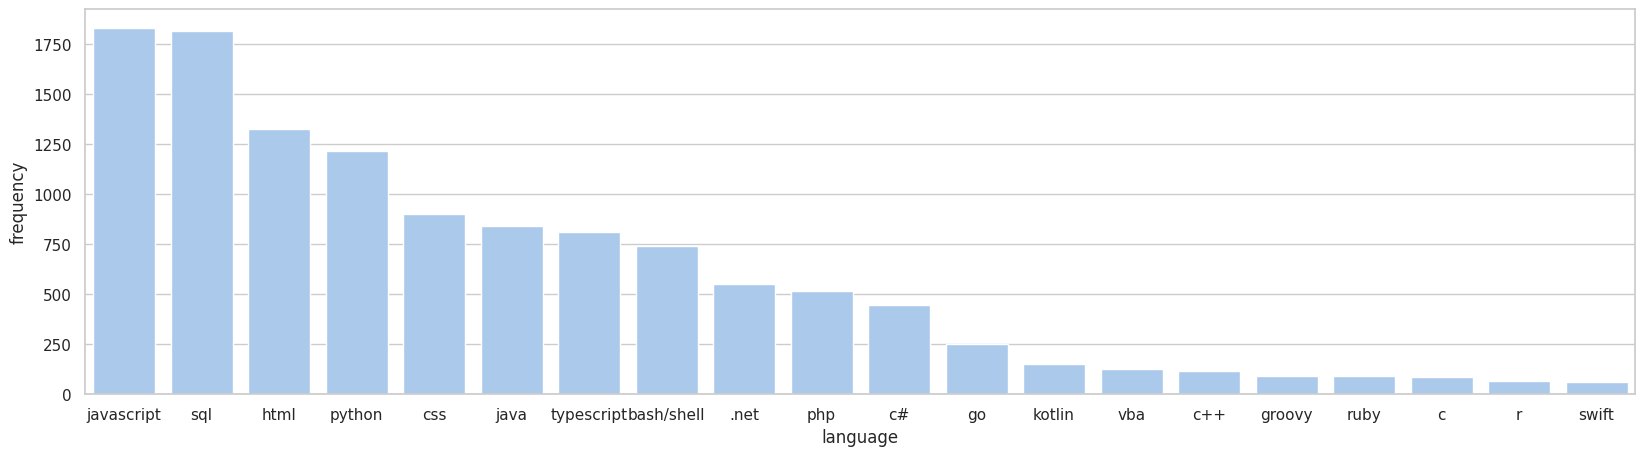

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="frequency", x="language", data=language_count[:20],
            label="Total", color="b")

# Add a legend and informative axis label
#sns.despine(left=True, bottom=True)

---
*En principio nos parece que un buen lugar para cortar es aquellos lenguajes que sean usados por más de 250 personas*

---

In [103]:
import numpy as np
df_language_count_over_250 = language_count[language_count.frequency > 250]
#df_language_count_over_250 #Tabla con los lenguajes que son sabidos por mas de 250 personas

df_language_count_over_250 = language_count[language_count.frequency > 250]
print('Lenguajes utilizados por mas de 250 personas:')
df_language_count_over_250


Lenguajes utilizados por mas de 250 personas:


,language,frequency
0,javascript,1831
1,sql,1814
2,html,1325
3,python,1217
4,css,899
5,java,842
6,typescript,808
7,bash/shell,740
8,.net,552
9,php,515


---
*Por otro lado analizando la proporción en que es usado cada lenguaje, otro criterio para definir los más populares sería aquellos usados por más del 10% de los encuestados*

---


In [104]:
a=len(df_filtrado_neto_mayor_a_50000) #Cantidad total de usuarios
vector_proporcion=[]
for lenguaje in language_count.frequency:
  vector_proporcion.append(lenguaje/a)
  #print(lenguaje/a)
print(vector_proporcion)
language_count['proporcion_respecto_del_total'] = vector_proporcion

[0.40171127687582275, 0.3979815708644142, 0.29069767441860467, 0.2670030715225976, 0.1972356296621325, 0.18473014480035102, 0.177270732777534, 0.16235190873189995, 0.12110574813514699, 0.112988152698552, 0.09828872312417727, 0.054848617814831066, 0.03268977621763931, 0.027424308907415533, 0.025010969723562967, 0.01996489688459851, 0.01952610794207986, 0.018867924528301886, 0.014480035103115402, 0.01338306274681878, 0.012066695919262835, 0.010092145677928916, 0.008775778850372971, 0.007898200965335674, 0.006362439666520404, 0.005923650724001755, 0.005484861781483106, 0.005046072838964458, 0.004168494953927161, 0.003949100482667837, 0.0035103115401491883, 0.003290917068889864, 0.003290917068889864, 0.00307152259763054, 0.0026327336551118913, 0.002193944712593243, 0.002193944712593243, 0.0019745502413339184, 0.0019745502413339184, 0.0017551557700745941, 0.00153576129881527, 0.0010969723562966214, 0.0010969723562966214, 0.0010969723562966214, 0.0010969723562966214, 0.0010969723562966214, 0

In [105]:
print('Lenguajes utilizados por mas del 10% de los encuestados')

df_con_proporcion = language_count[language_count.proporcion_respecto_del_total>0.1]
df_con_proporcion
#La tabla muestra los lenguajes de programacion, la cantidad de usuarios que usan ese lenguaje y en su tercer columna
#agregamos la proporcion de personas que usan ese lenguaje respecto del total de programadores de la encuesta (ya filtrada por salario>50000)

Lenguajes utilizados por mas del 10% de los encuestados


,language,frequency,proporcion_respecto_del_total
0,javascript,1831,0.401711
1,sql,1814,0.397982
2,html,1325,0.290698
3,python,1217,0.267003
4,css,899,0.197236
5,java,842,0.184730
6,typescript,808,0.177271
7,bash/shell,740,0.162352
8,.net,552,0.121106
9,php,515,0.112988


---
*Como este último criterio justo nos da un listado de 10, decidimos usar este y trabajar con el Top 10 de lenguajes más populares*

---


In [106]:
import pandas as pd
relevant_rows = ['javascript', 'sql', 'html', 'python', 'css', 'java','typescript','bash/shell','.net', 'php']
#indice = df_lang.programming_language.index('javascript')
df_nueva = df_lang[df_lang["programming_language"].isin(relevant_rows)]
#df_lenguajes_popu = df_lang[df_lang.]
df_nueva.programming_language.unique()
df_nueva.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s))

count       10543.00
mean       326684.36
std        405816.20
min         51000.00
25%        155487.00
50%        230000.00
75%        325000.00
max      15000000.00
Name: salary_monthly_NETO, dtype: object

<Axes: xlabel='salary_monthly_NETO', ylabel='programming_language'>

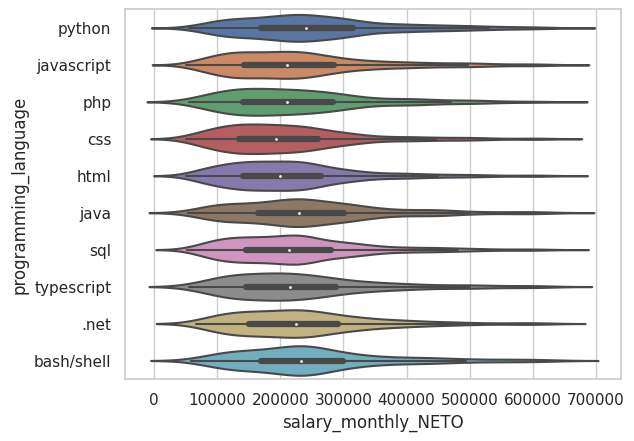

In [107]:
#EN EJE Y: SALARIOS
#EN EJE X: LENGUAJES
#Los lenguajes los podemos ordenar de acuerdo a su popularidad
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=df_nueva[df_nueva.salary_monthly_NETO<650000], x="salary_monthly_NETO", y="programming_language")


---

*Gráficamente podemos ver que la distribución de la variable salario no es simétrica, por lo tanto la mediana del salario es una mejor medida para comparar entre cada lenguaje. Como las medianas y los gráficos de violín coinciden a simple vista, podemo intuir que no existe una diferencia significativa entre los salarios según el lenguaje de programación que se utilice.*

---


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

---

*Utilizaremos las columnas con las cuales nos quedamos al inicio del trabajo:*

1. **tools_programming_languages**
2. **salary_monthly_NETO**
3. **salary_monthly_BRUTO**
4. **work_dedication**
5. **work_contract_type**
6. **work_years_in_current_position**
7. **profile_years_experience**
8. **profile_age**
9. **profile_gender**

---


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




---

*Vamos a trabajar con las siguientes variables:*

*Numéricas:*


1.   Salario mensual neto
2.   Edad
3.   Años de experiencia

*Categóricas:*

*   Provincia
*   Género






---


In [108]:
#Otra opcion para la numerica 2: work_years_in_company (antiguedad)

---
*Queremos primero seleccionar un subgrupo de acuerdo al salario para poder trabajar sin tener en cuenta los outliers ni los que cobren los salarios más altos*

---


In [109]:
df_filtrado_neto_mayor_a_50000.salary_monthly_NETO.describe()

count    4.558000e+03
mean     3.190078e+05
std      4.203561e+05
min      5.100000e+04
25%      1.500000e+05
50%      2.250000e+05
75%      3.152168e+05
max      1.500000e+07
Name: salary_monthly_NETO, dtype: float64

In [110]:
import statistics as stats
mediana = df_filtrado_neto_mayor_a_50000.salary_monthly_NETO.median()
desvio_estandar = stats.stdev(df_filtrado_neto_mayor_a_50000.salary_monthly_NETO)
filtro_oultiers = mediana+2*desvio_estandar #Primer forma de encontrar un limite para hacer el filtrado
print(mediana)
print(desvio_estandar)
print(filtro_oultiers)

225000.0
420356.0935311147
1065712.1870622295


In [111]:
datos_95_salario = np.percentile(df_filtrado_neto_mayor_a_50000.salary_monthly_NETO, 95) #Segunda forma de encontrar un limite para hacer el filtrado
print(datos_95_salario)
#Optamos por esta forma para hacer el filtrado

950000.0


---
*Primero vamos a ver cómo se comporta el salario con respecto a la edad*

---


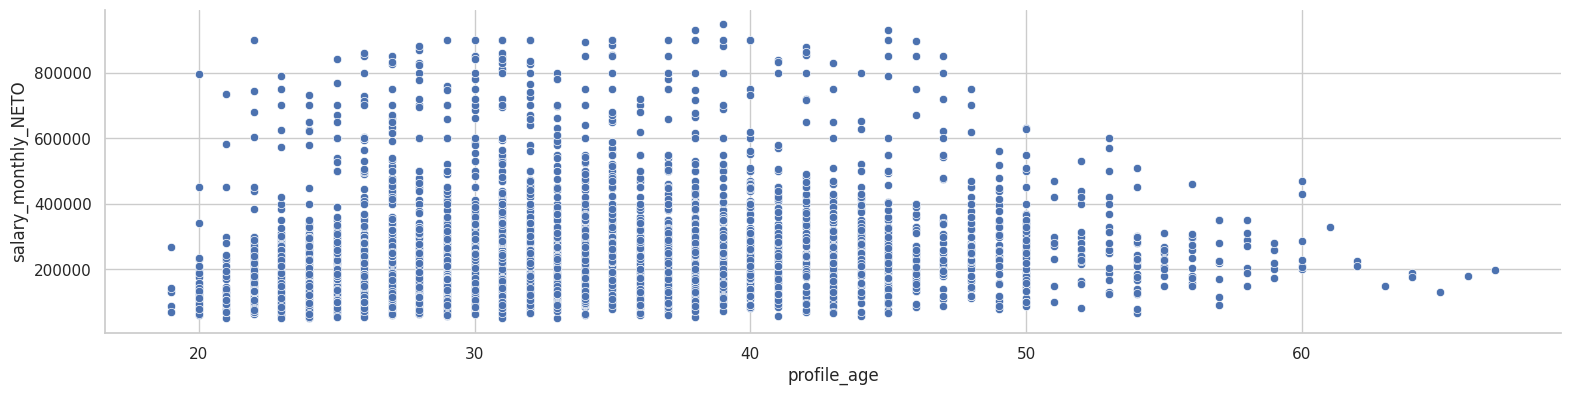

In [112]:
seaborn.pairplot(data=df_filtrado_neto_mayor_a_50000[ df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario ],
                 y_vars=['salary_monthly_NETO'],
                 x_vars=['profile_age'],
                 aspect=4, height=4)

---

*Como la variable edad es discreta, nos parece que se puede visualizar mejor la información del salario asociado a la edad si la agrupamos de a intervalos. También vemos que muy pocos encuestrados tienen menos de 20 o más de 60 años, por lo que no los consideramos para el análisis*

---


Encuestados con menos de 20 años: 5
Encuestados con más de 60 años: 9


<ipython-input-113-d667c6152fe5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_age'] >= 20) & (df_filtrado_neto_mayor_a_50000['profile_age'] <= 29), 'age_interval'] = '20-29'


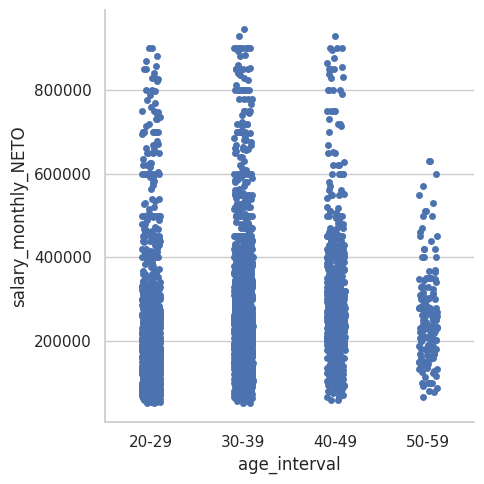

In [113]:
count_20 = (df_filtrado_neto_mayor_a_50000['profile_age'] < 20).sum()
print('Encuestados con menos de 20 años:', count_20)

count_60 = (df_filtrado_neto_mayor_a_50000['profile_age'] > 60).sum()
print('Encuestados con más de 60 años:', count_60)


#Son muy pocos menores a 20 o mayores a 60 así que no los tengo en cuenta para hacer mis intervalos
#Intervalos de entre20-29, 30-39, 40-49, 50-59

df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_age'] >= 20) & (df_filtrado_neto_mayor_a_50000['profile_age'] <= 29), 'age_interval'] = '20-29'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_age'] >= 30) & (df_filtrado_neto_mayor_a_50000['profile_age'] <= 39), 'age_interval'] = '30-39'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_age'] >= 40) & (df_filtrado_neto_mayor_a_50000['profile_age'] <= 49), 'age_interval'] = '40-49'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_age'] >= 50) & (df_filtrado_neto_mayor_a_50000['profile_age'] <= 59), 'age_interval'] = '50-59'

age_order = ['20-29', '30-39', '40-49', '50-59']

sns.catplot(data=df_filtrado_neto_mayor_a_50000[ df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario ], x='age_interval', y='salary_monthly_NETO', order=age_order)


---

*Ahora repetimos lo mismo para los años de experiencia*

---


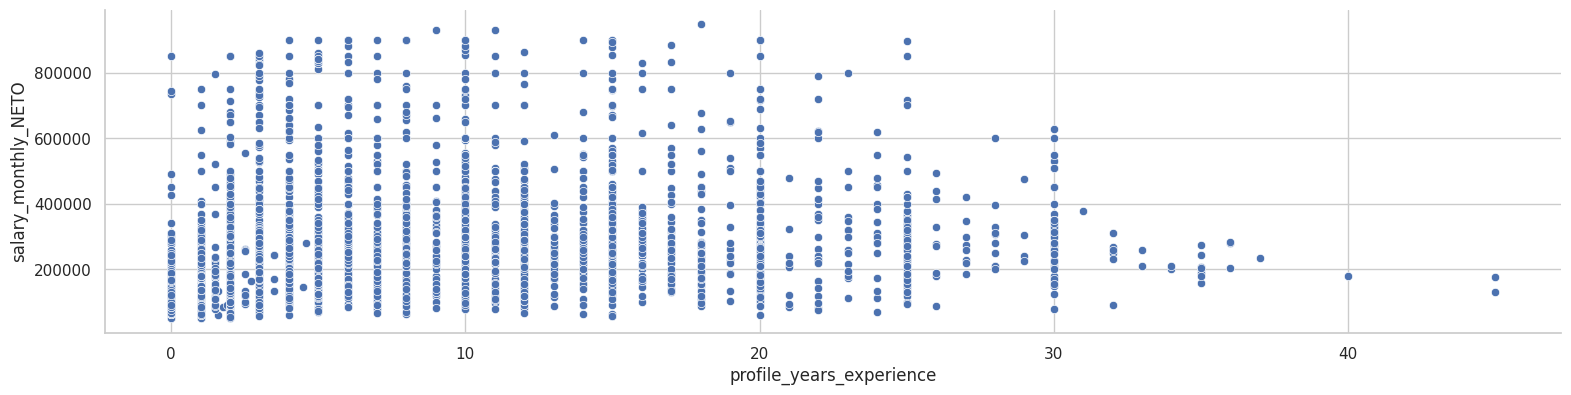

In [114]:
seaborn.pairplot(data=df_filtrado_neto_mayor_a_50000[ df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario ],
                 y_vars=['salary_monthly_NETO'],
                 x_vars=['profile_years_experience'],
                 aspect=4, height=4)

Encuestados con más de 30 años de experiencia: 27


<ipython-input-115-09ae452f395e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_years_experience'] >= 0) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 5), 'experience_interval'] = 'menos de 5'


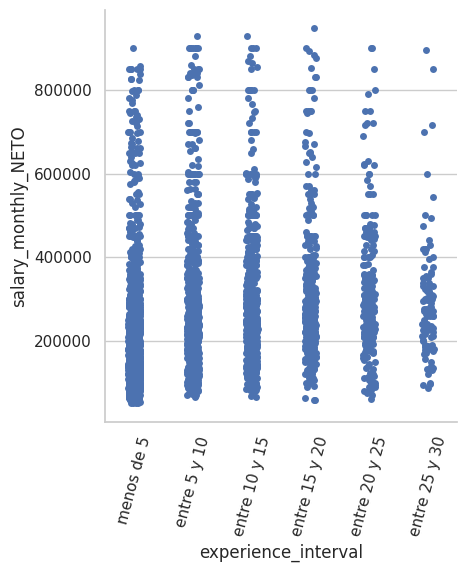

In [115]:
count_30 = (df_filtrado_neto_mayor_a_50000['profile_years_experience'] > 30).sum()
print('Encuestados con más de 30 años de experiencia:', count_30)

#Son pocos con más de 30 años de experiencia así que no los tengo en cuenta para hacer mis intervalos
#Intervalos semi cerrados de a 5 años

df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_years_experience'] >= 0) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 5), 'experience_interval'] = 'menos de 5'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_years_experience'] >= 5) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 10), 'experience_interval'] = 'entre 5 y 10'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_years_experience'] >= 10) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 15), 'experience_interval'] = 'entre 10 y 15'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_years_experience'] >= 15) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 20), 'experience_interval'] = 'entre 15 y 20'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_years_experience'] >= 20) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 25), 'experience_interval'] = 'entre 20 y 25'
df_filtrado_neto_mayor_a_50000.loc[(df_filtrado_neto_mayor_a_50000['profile_years_experience'] >= 25) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 30), 'experience_interval'] = 'entre 25 y 30'




experience_order = ['menos de 5', 'entre 5 y 10', 'entre 10 y 15', 'entre 15 y 20', 'entre 20 y 25', 'entre 25 y 30']

sns.catplot(data=df_filtrado_neto_mayor_a_50000[ df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario ], x='experience_interval', y='salary_monthly_NETO', order=experience_order)
plt.xticks(rotation=75)
plt.show()



---

*Ahora queremos ver cómo se comporta el salario respecto a la provincia y el género. Para eso primero reagrupamos la columna de género en Diversidades, Mujeres y Varones Cisgénero*

---


In [116]:
print(df_filtrado_neto_mayor_a_50000.profile_gender.unique())

['Varón Cis' 'Varón cis' 'Mujer Cis' 'Mujer' 'Varón Trans' 'Queer'
 'No binarie' 'Mujer cis' 'Mujer Trans' 'mujer' 'Gay' 'Fluido' 'Bigénero'
 'Femenino']


In [140]:
df_filtrado_neto_mayor_a_50000.loc[df_filtrado_neto_mayor_a_50000['profile_gender'].isin(['Varón Cis', 'Varón cis']), 'profile_gender'] = 'Cisgender Man'
df_filtrado_neto_mayor_a_50000.loc[df_filtrado_neto_mayor_a_50000['profile_gender'].isin(['Mujer Cis', 'Mujer', 'Mujer cis', 'mujer', 'Femenino']), 'profile_gender'] = 'Cisgender Woman'
df_filtrado_neto_mayor_a_50000.loc[df_filtrado_neto_mayor_a_50000['profile_gender'].isin(['Varón Trans', 'Queer', 'No binarie', 'Mujer Trans', 'Gay', 'Fluido', 'Bigénero']), 'profile_gender'] = 'Diversities'


In [141]:
print(df_filtrado_neto_mayor_a_50000.profile_gender.unique())

['Cisgender Man' 'Cisgender Woman' 'Diversities']


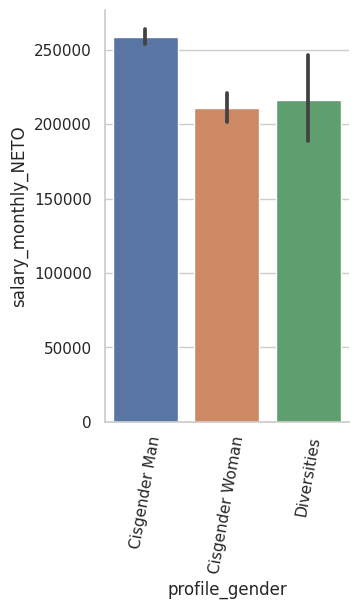

In [119]:
sns.catplot(
    data=df_filtrado_neto_mayor_a_50000[ df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario ], x="profile_gender", y="salary_monthly_NETO",
    kind="bar", height=5, aspect=0.75)
plt.xticks(rotation=80)
plt.show()

---

*Podemos intuir a partir del gráfico que quizás la probabilidad de ganar un salario mayor sea más alta siendo Varón Cis que Mujer Cis o de Diversidades. Hay que tener en cuenta que la cantidad de Varones Cis es MUCHO mayor que las de Mujeres Cis y Diversidades, puede estar afectando al analisis.*

---


---

*Ahora queremos ver si los salarios son parecidos en cada provincia*

---

In [120]:
print(df_filtrado_neto_mayor_a_50000.work_province.unique())

['Catamarca' 'Chaco' 'Chubut' 'Ciudad Autónoma de Buenos Aires' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Provincia de Buenos Aires' 'Río Negro'
 'Salta' 'San Juan' 'San Luis' 'Santa Cruz' 'Santa Fe'
 'Santiago del Estero' 'Tierra del Fuego' 'Tucumán']


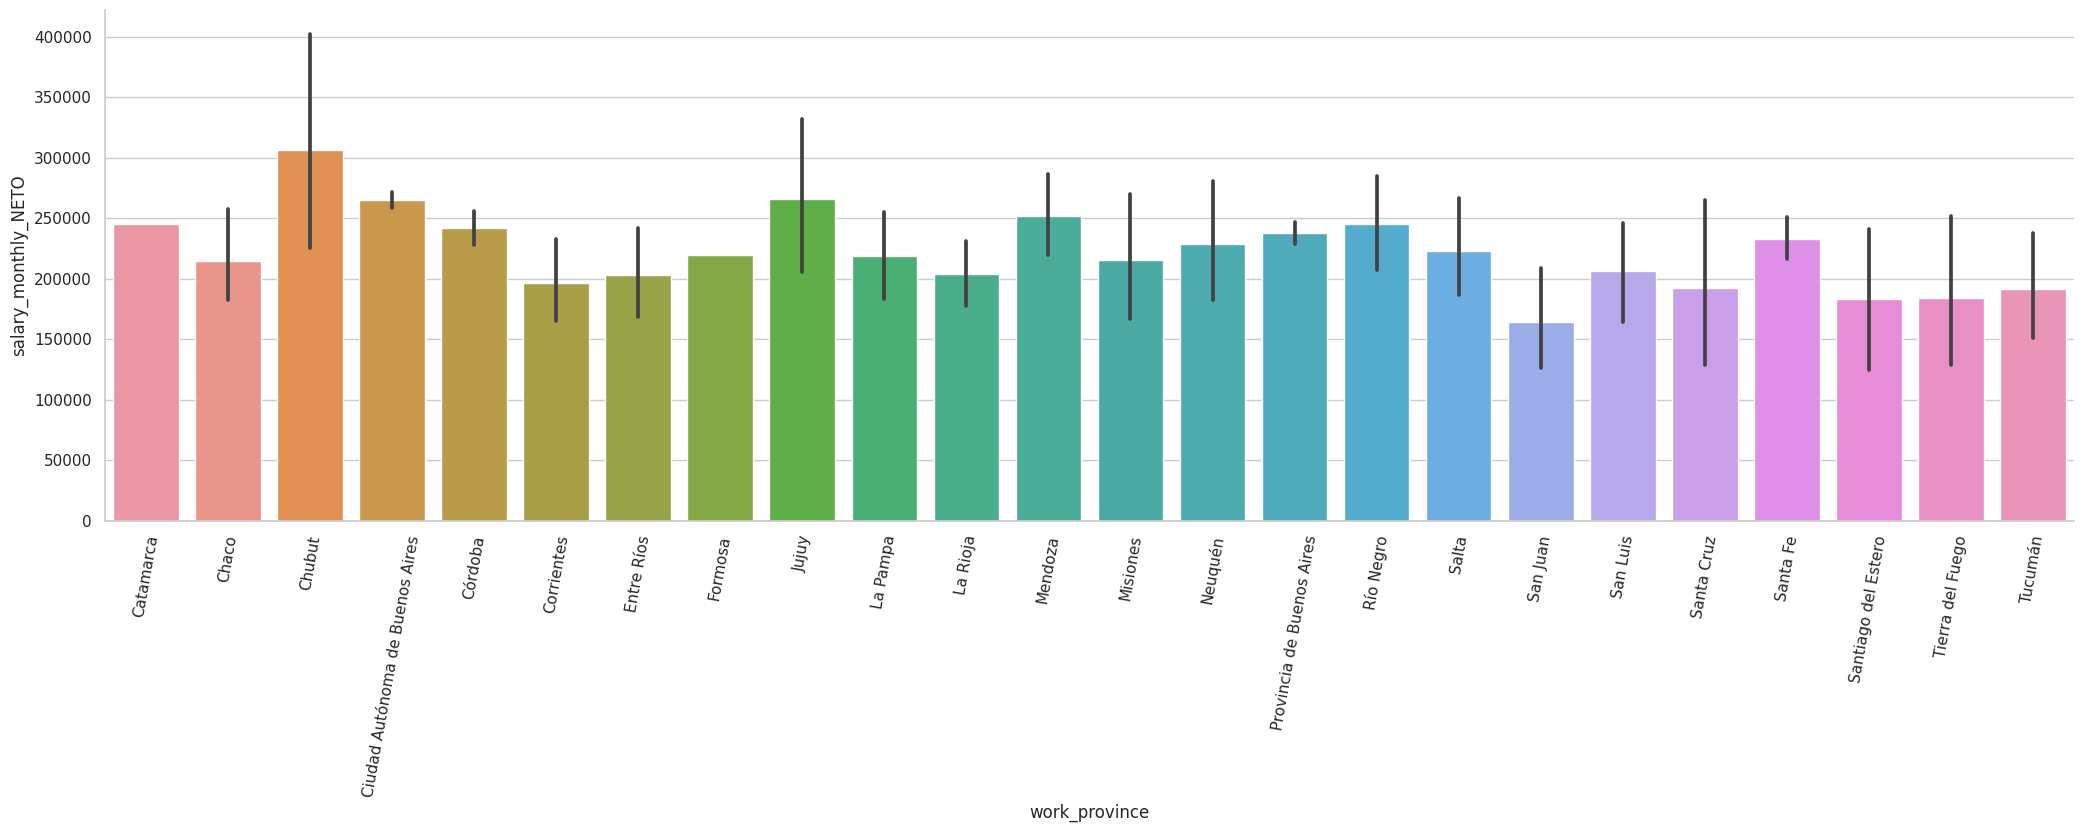

In [121]:
sns.catplot(
    data=df_filtrado_neto_mayor_a_50000[ df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario ], x="work_province", y="salary_monthly_NETO",
    kind="bar", height=6, aspect=3.5)
plt.xticks(rotation=80)


plt.show()

---

*A simple vista pareciera que uno tiene mayor probabilidad de cobrar un salario más alto si vive en Chubut, CABA, Jujuy o Mendoza. Pero para comprobar esto hacen falta otros tipos de análisis*

---


---

*Nos preguntamos si las diferencias en el salario con respecto al género serán diferentes para cada provincia. Sin embargo, es difícil suponer si tienen relación porque en muchas provincias hay poca gente encuestada o directamente no hay mujeres cisgénero o diversidades*

--- 

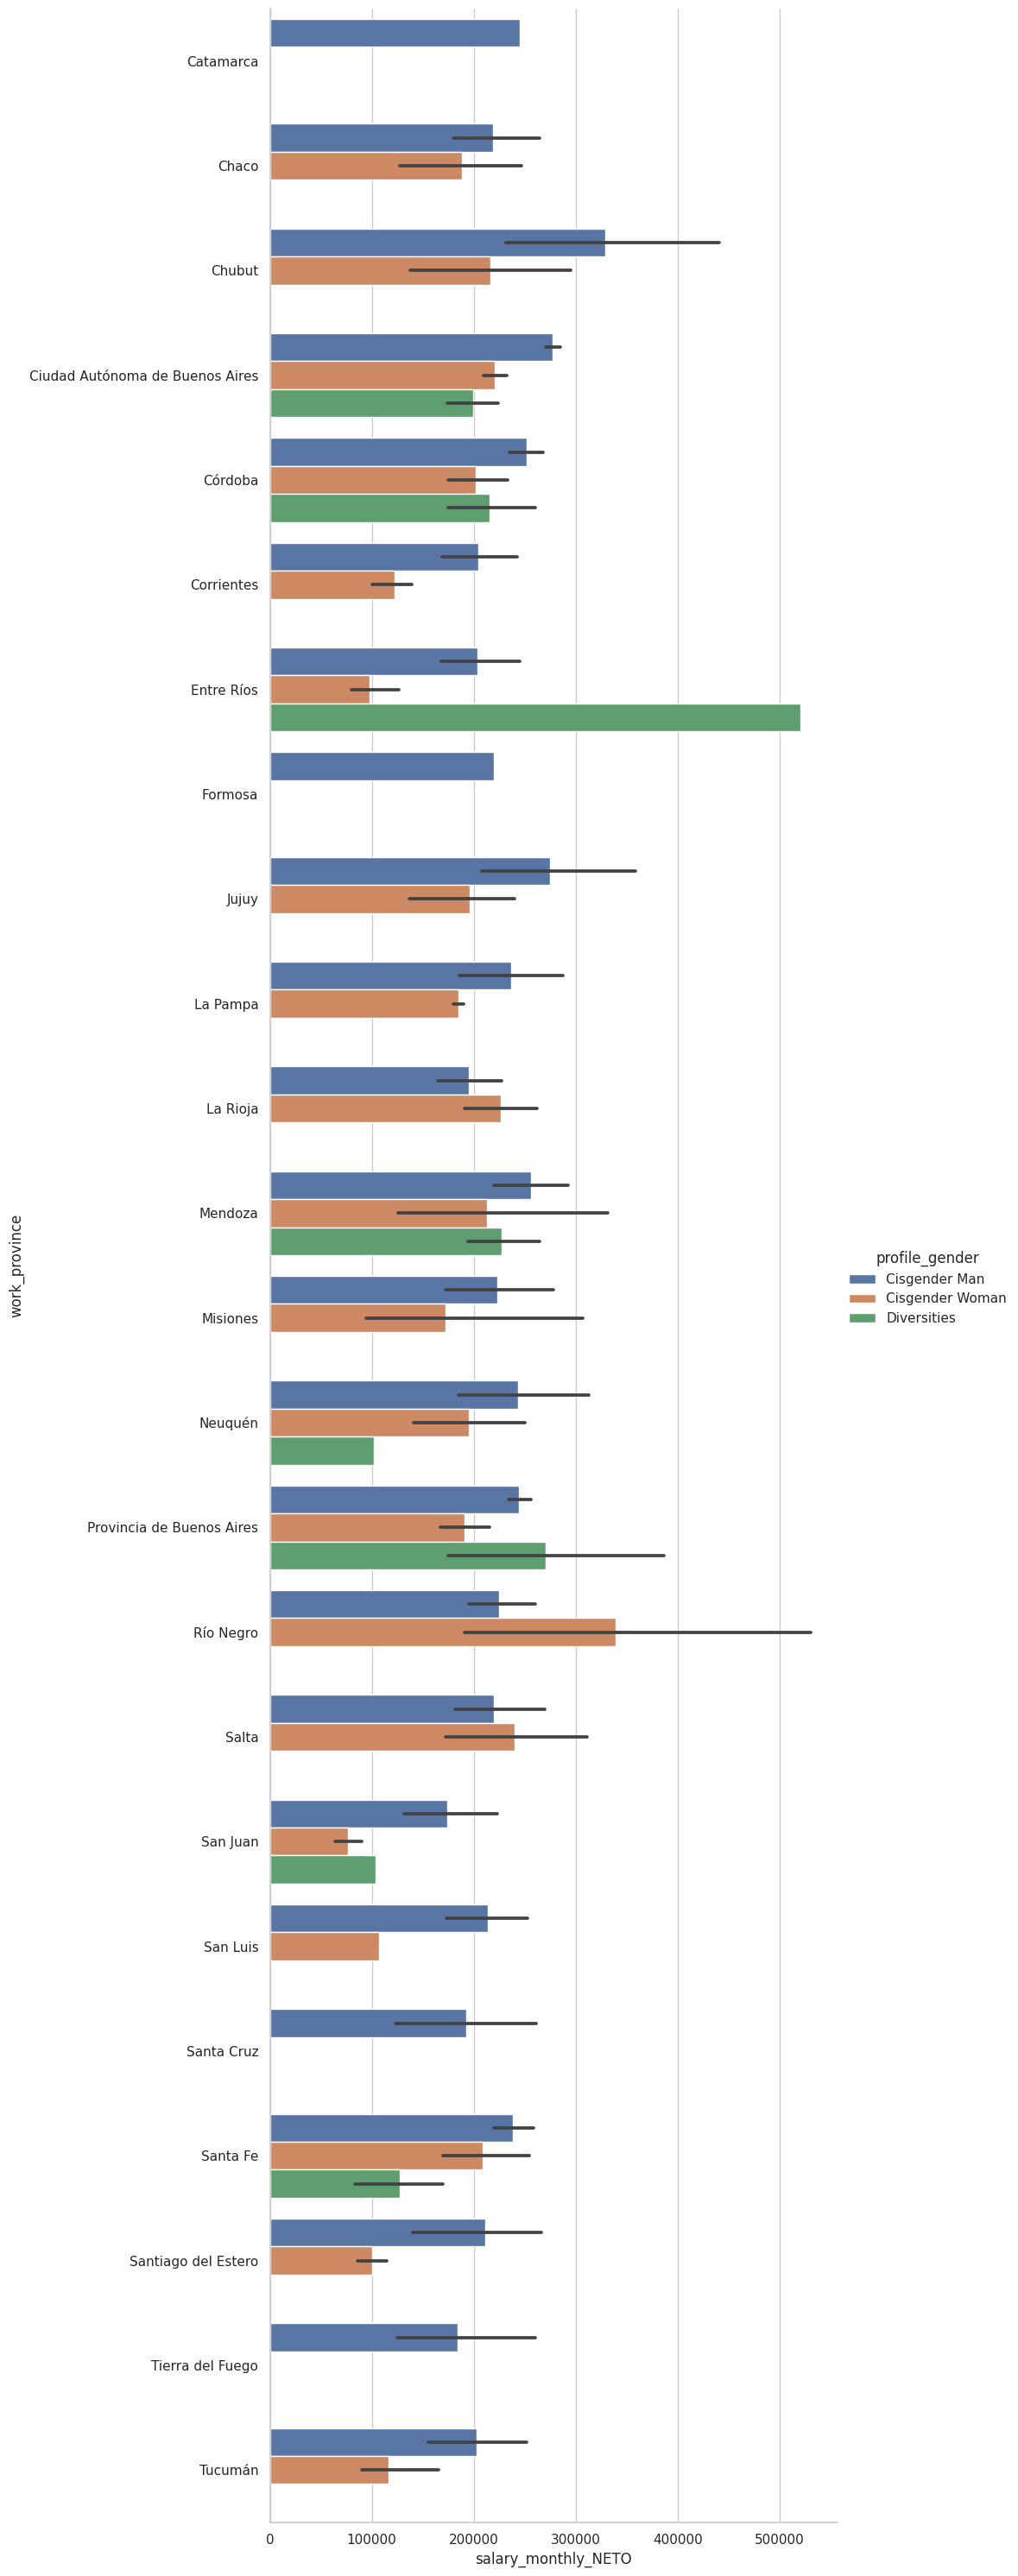

In [122]:
sns.catplot(data=df_filtrado_neto_mayor_a_50000[ df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario ],
            x="salary_monthly_NETO", y="work_province",
            hue="profile_gender", kind="bar", height=30, aspect=.35)
plt.show()


---

*También queremos ver si hay provincias donde se concentren más las diversidades o mujeres programadoras. Podemos ver que en CABA y Provincia de Buenos Aires se concentra mayor cantidad.*

---


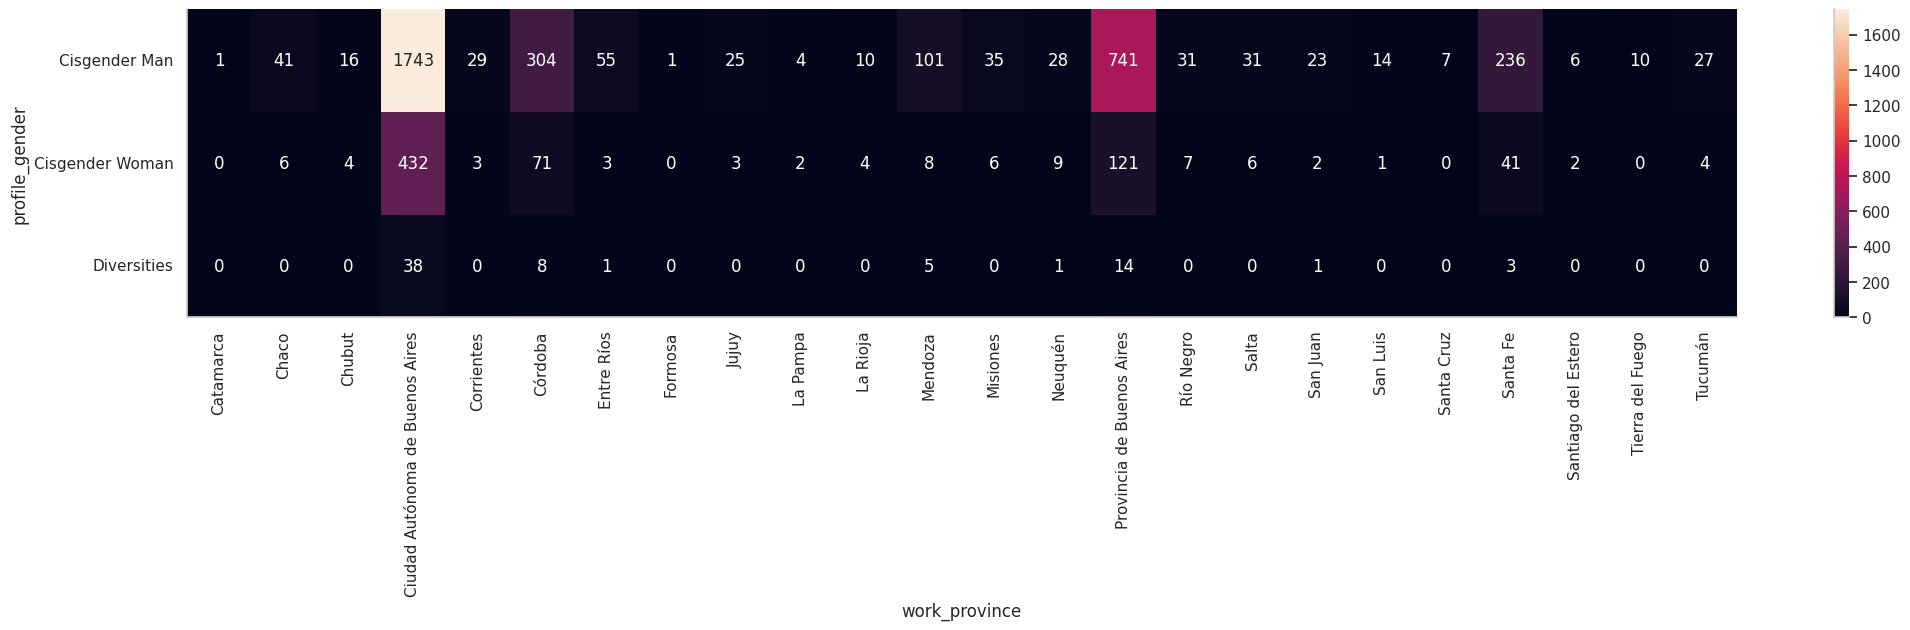

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 4))
exp = pd.crosstab(df_filtrado_neto_mayor_a_50000[df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario].profile_gender,
                  df_filtrado_neto_mayor_a_50000[df_filtrado_neto_mayor_a_50000.salary_monthly_NETO < datos_95_salario].work_province)
sns.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
sns.despine()
plt.show()


## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



---
*Analizamos gráficamente la nube de puntos y analíticamente el coeficiente de correlación entre ambas variables. Como nos da casi 1, eso significa que el salario mensual neto y el bruto están directamente relacionados  y por lo tanto nos dan la misma información, por lo cual no es necesario trabajar con ambos, basta con elegir uno*

---


matriz de varianza covarianza: 
 [[6.63310617e+10 4.69544450e+10]
 [4.69544450e+10 3.72406815e+10]] 

matriz de correlaciones: 
  [[1.         0.94473374]
 [0.94473374 1.        ]] 

correlación entra ambas variables:  0.9447337431942205 



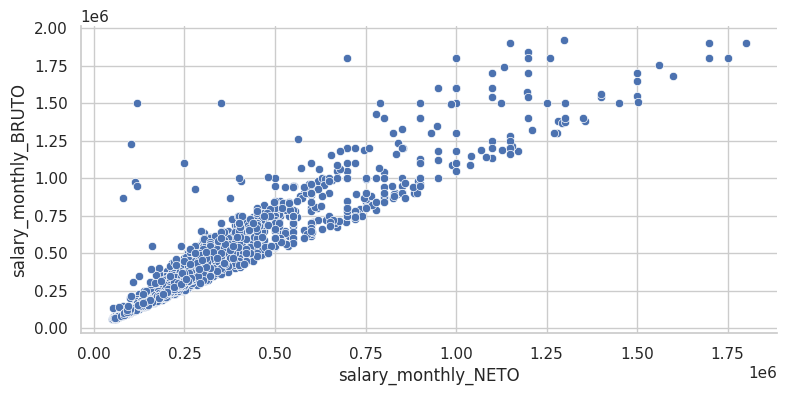

In [124]:
df_limpio = df_filtrado_neto_mayor_a_50000[(df_filtrado_neto_mayor_a_50000.salary_monthly_NETO<df_filtrado_neto_mayor_a_50000.salary_monthly_BRUTO)&(df_filtrado_neto_mayor_a_50000.salary_monthly_BRUTO<2000000)]


seaborn.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

matcov=np.cov(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






---

*Para estudiar la distribución del salario según el nivel de estudio vamos a dividir a la población en dos subpoblaciones diferentes:*

1. *Aquellos programadores con nivel de estudio terciario o inferior.*
2. *Aquellos programadores con nivel de estudio universitario o superior.*

---


In [125]:
print(df.profile_studies_level.unique())

['Universitario' nan 'Terciario' 'Secundario' 'Posgrado/Especialización'
 'Maestría' 'Doctorado' 'Posdoctorado']


In [126]:
df_filtrado_neto_mayor_a_50000 = df[(df.salary_monthly_NETO>50000) & (df.work_dedication=='Full-Time')]
df_filtrado_educacion_superior = df_filtrado_neto_mayor_a_50000[df_filtrado_neto_mayor_a_50000.profile_studies_level.isin(['Universitario', 'Posgrado/Especialización', 'Maestría', 'Doctorado', 'Posdoctorado'])]
df_filtrado_educacion_superior

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,salary_%_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,NaN,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
5,Argentina,Chaco,Full-Time,Staff (planta permanente),633000.0,395000.0,Cobro parte del salario en dólares,NaN,NaN,NaN,...,Completo,Licenciatura en Sistemas de Información,UNNE - Universidad Nacional Del Nordeste,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
7,Argentina,Chaco,Full-Time,Staff (planta permanente),157000.0,127000.0,NaN,NaN,NaN,NaN,...,Completo,Licenciatura en Administración,UCP - Universidad de la Cuenca del Plata,NaN,NaN,No,0.0,Bruto,35,Varón Cis
9,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),190000.0,178000.0,Cobro todo el salario en dólares,NaN,NaN,NaN,...,Incompleto,Ingeniería en Sistemas de Información,NaN,NaN,NaN,NaN,NaN,NaN,29,Varón Cis
10,Argentina,Chaco,Full-Time,Staff (planta permanente),242000.0,202029.0,Mi sueldo está dolarizado (pero cobro en moned...,132,NaN,NaN,...,En curso,Electromecánica,UTN - Universidad Tecnológica Nacional,NaN,Informatorio,No,0.0,Porcentaje de mi sueldo bruto,30,Varón Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342,Argentina,Tucumán,Full-Time,Tercerizado (trabajo a través de consultora o ...,163870.0,136000.0,NaN,NaN,NaN,NaN,...,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,NaN,NaN,NaN,NaN,NaN,29,Varón Cis
5343,Argentina,Tucumán,Full-Time,Staff (planta permanente),206000.0,206000.0,NaN,NaN,NaN,NaN,...,Completo,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,NaN,NaN,NaN,NaN,NaN,46,Varón Cis
5348,Argentina,Tucumán,Full-Time,Remoto (empresa de otro país),300000.0,294000.0,Cobro todo el salario en dólares,NaN,NaN,NaN,...,Incompleto,Licenciatura en Psicologia,UNT - Universidad Nacion de Tucuman,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,30,Varón cis
5351,Argentina,Tucumán,Full-Time,Tercerizado (trabajo a través de consultora o ...,110000.0,91000.0,NaN,NaN,NaN,NaN,...,Incompleto,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,NO,NaN,No,0.0,Porcentaje de mi sueldo bruto,29,Mujer Cis


In [127]:
df_filtrado_educacion_inferior = df_filtrado_neto_mayor_a_50000[df_filtrado_neto_mayor_a_50000.profile_studies_level.isin(['Terciario', 'Secundario'])]
df_filtrado_educacion_inferior

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,salary_%_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
6,Argentina,Chaco,Full-Time,Staff (planta permanente),110000.00,90000.0,Mi sueldo está dolarizado (pero cobro en moned...,125,NaN,NaN,...,Incompleto,Tecnicatura en Programación,Instituto Barranqueras,Informatorio Chaco,Programación web,No,0.0,Porcentaje de mi sueldo bruto,33,Varón Cis
23,Argentina,Chaco,Full-Time,Staff (planta permanente),212765.96,172601.0,NaN,NaN,NaN,NaN,...,Completo,NaN,NaN,NaN,NaN,"Sí, activa",0.0,Porcentaje de mi sueldo bruto,33,Varón Cis
80,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),256700.00,213000.0,NaN,NaN,NaN,NaN,...,En curso,Tecnicatura Superior en Redes Informaticas,TECLAB,Coderhouse,Javascript y ReactJs,No,0.0,Bruto,28,Varón cis
84,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,230000.00,210000.0,NaN,NaN,NaN,NaN,...,Completo,Tecnicatura en Programación,UTN - Universidad Tecnológica Nacional,No,No,No,0.0,Bruto,34,Varón Trans
85,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Freelance,86000.00,59600.0,NaN,NaN,NaN,NaN,...,En curso,Tecnicatura en Programación,UTN - Universidad Tecnológica Nacional,NAHUAL IT,QA FUNCIONAL,"Sí, pasiva",0.0,Bruto,27,Varón Trans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,Argentina,Tierra del Fuego,Full-Time,Staff (planta permanente),430880.00,360000.0,NaN,NaN,NaN,NaN,...,Completo,Tecnicatura en Programación,UTN - Universidad Tecnológica Nacional,NaN,NaN,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,43,Varón Cis
5315,Argentina,Tucumán,Full-Time,Staff (planta permanente),123000.00,100000.0,NaN,NaN,NaN,NaN,...,En curso,Tecnicatura en Programación,Instituto Educación Superior Teclab,NaN,NaN,NaN,NaN,NaN,26,Varón Cis
5322,Argentina,Tucumán,Full-Time,Staff (planta permanente),64000.00,64000.0,NaN,NaN,NaN,NaN,...,Incompleto,Tecnicatura Superior en Programación,UTN - Universidad Tecnológica Nacional,NaN,NaN,No,0.0,Neto,24,Varón Cis
5337,Argentina,Tucumán,Full-Time,Staff (planta permanente),546000.00,384000.0,Cobro parte del salario en dólares,NaN,NaN,NaN,...,Completo,Analista de Sistemas,NaN,NaN,NaN,"Sí, activa",0.0,Bruto,35,Varón Cis


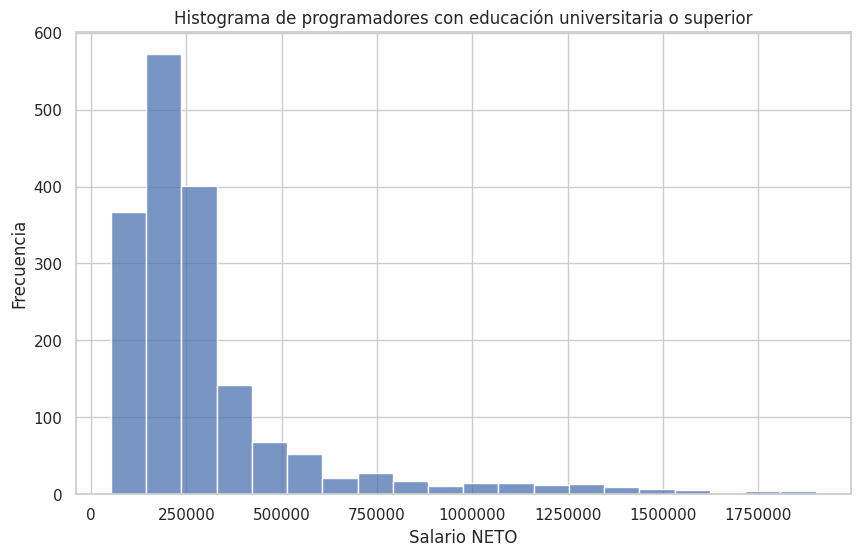

In [128]:
plt.figure(figsize=(10,6))
seaborn.histplot(df_filtrado_educacion_superior[df_filtrado_educacion_superior.salary_monthly_NETO<2000000], x="salary_monthly_NETO", bins = 20)
plt.ylabel('Frecuencia')
plt.xlabel('Salario NETO')
plt.title('Histograma de programadores con educación universitaria o superior')
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

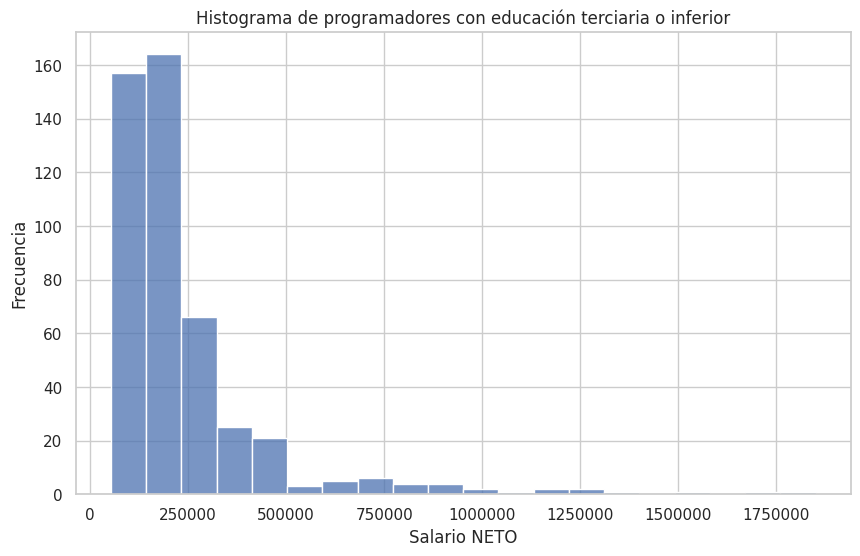

In [129]:
plt.figure(figsize=(10,6))
seaborn.histplot(df_filtrado_educacion_inferior[df_filtrado_educacion_inferior.salary_monthly_NETO<2000000], x="salary_monthly_NETO", bins = 20)
plt.ylabel('Frecuencia')
plt.xlabel('Salario NETO')
plt.title('Histograma de programadores con educación terciaria o inferior')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

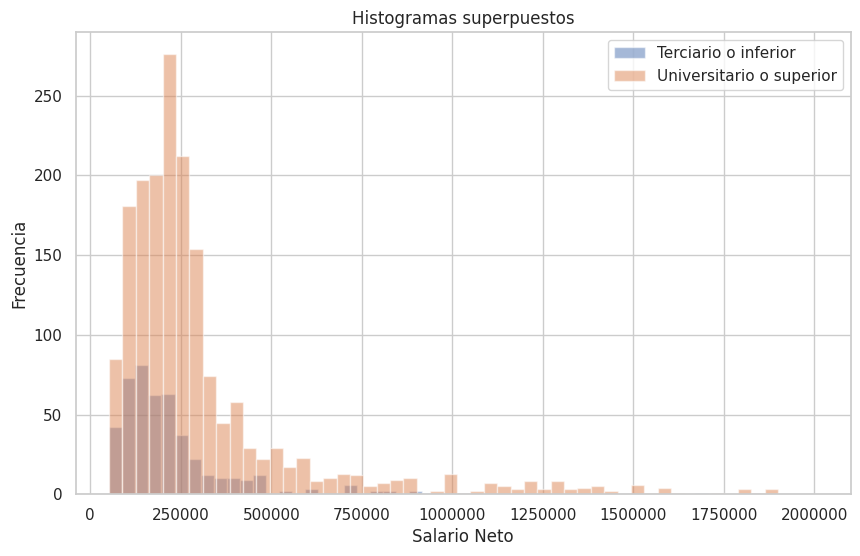

In [130]:
plt.figure(figsize=(10,6))
plt.hist(df_filtrado_educacion_inferior[df_filtrado_educacion_inferior.salary_monthly_NETO<2000000]['salary_monthly_NETO'], 
         alpha=0.5, # the transaparency parameter
         label='Terciario o inferior', bins = 50)
  
plt.hist(df_filtrado_educacion_superior[df_filtrado_educacion_superior.salary_monthly_NETO<2000000]['salary_monthly_NETO'],
         alpha=0.5,
         label='Universitario o superior', bins = 50)
plt.ylabel('Frecuencia')
plt.xlabel('Salario Neto')  
plt.legend(loc='upper right')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Histogramas superpuestos')
plt.xlim(right=2100000)
plt.show()

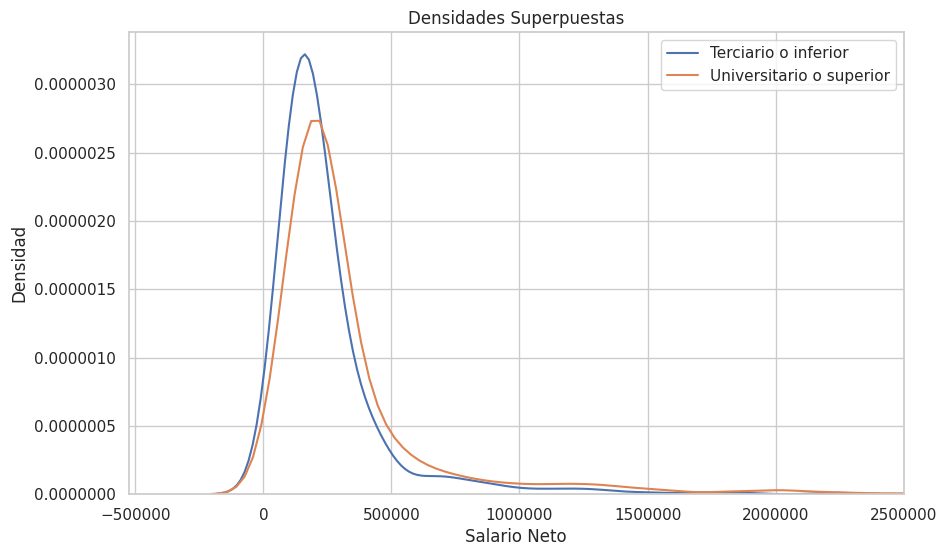

In [131]:
plt.figure(figsize=(10,6))
seaborn.kdeplot(x = "salary_monthly_NETO", data = df_filtrado_educacion_inferior, label='Terciario o inferior')
seaborn.kdeplot(x = "salary_monthly_NETO", data = df_filtrado_educacion_superior, label='Universitario o superior')
plt.ylabel('Densidad')
plt.xlabel('Salario Neto')  
plt.legend(loc='upper right')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Densidades Superpuestas')
plt.xlim(right=2500000)
plt.show()

---

*Luego calculamos ahora las medidas de centralización y dispersión para cada una de las subpoblaciones*

---


In [132]:
df_filtrado_educacion_superior['salary_monthly_NETO'].mean(), df_filtrado_educacion_inferior['salary_monthly_NETO'].mean()

(335700.649568869, 253568.08094017094)

In [133]:
df_filtrado_educacion_superior['salary_monthly_NETO'].median(), df_filtrado_educacion_inferior['salary_monthly_NETO'].median()

(230000.0, 180000.0)

In [134]:
df_filtrado_educacion_superior['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s)) 

count       1786.00
mean      335700.65
std       379226.50
min        52000.00
25%       160000.00
50%       230000.00
75%       327830.75
max      6000000.00
Name: salary_monthly_NETO, dtype: object

In [135]:
df_filtrado_educacion_inferior['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count        468.00
mean      253568.08
std       268569.51
min        53000.00
25%       126000.00
50%       180000.00
75%       257750.00
max      2700000.00
Name: salary_monthly_NETO, dtype: object

In [136]:
import scipy

print("Coeficiente de variación salario neto, educación superior:",
      scipy.stats.variation(df_filtrado_educacion_superior.salary_monthly_NETO))
print("Coeficiente de variación salario neto, educación inferior:",
     scipy.stats.variation(df_filtrado_educacion_inferior.salary_monthly_NETO))

Coeficiente de variación salario neto, educación superior: 1.129340449986231
Coeficiente de variación salario neto, educación inferior: 1.0580291637457595


---

*Como vemos, el salario neto de los programadores con educación superior tiene mayor variabilidad.*

*Podemos concluir que las variables salario neto y nivel de estudios NO son independientes. La media y mediana para el salario neto de programadores con estudios universitarios o superiores es mayor a la de aquellos programadores con estudios terciarios o inferiores.*

*Esto también se puede interpretar como lo siguiente: "la probabilidad de que un programador gane por encima de la media dado que posee estudios terciarios o inferiores NO es igual a la probabilidad de que gane por encima de la media independientemente de su nivel de estudios"*

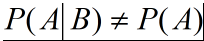

---


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


---

*Seleccionamos como variables numéricas:*

Salario Neto

*   Salario neto
*   Años de experiencia


*Y vamos a analizarlo según el género (usando solamente como géneros Diversidades, Varón y Mujer cisgénero).*

---


Años de experiencia promedio de todas las personas encuestadas= 6.9833254883502 Salario promedio de todas las personas encuestadas= 249598.9145893151


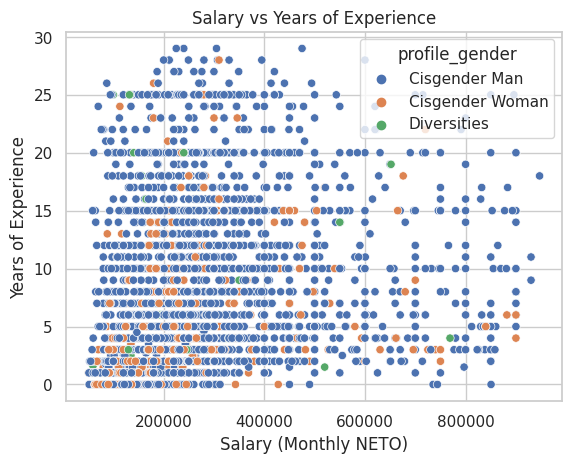

In [142]:
last_df = df_filtrado_neto_mayor_a_50000[(df_filtrado_neto_mayor_a_50000['salary_monthly_NETO'] < datos_95_salario) & (df_filtrado_neto_mayor_a_50000['profile_age'].between(20, 60)) & (df_filtrado_neto_mayor_a_50000['profile_years_experience'] < 30)]

print('Años de experiencia promedio de todas las personas encuestadas=',last_df['profile_years_experience'].mean(), 'Salario promedio de todas las personas encuestadas=', last_df['salary_monthly_NETO'].mean())


sns.scatterplot(data=last_df,
                x="salary_monthly_NETO", y="profile_years_experience", hue="profile_gender")
plt.xlabel("Salary (Monthly NETO)")
plt.ylabel("Years of Experience")
plt.title("Salary vs Years of Experience")

plt.show()


In [143]:
#PARA HOMBRES CIS
cisgender_men_df = last_df[last_df['profile_gender'] == 'Cisgender Man']

print('Años de experiencia promedio de hombres encuestados=',cisgender_men_df['profile_years_experience'].mean(), 'Salario promedio de hombres encuestados=', cisgender_men_df['salary_monthly_NETO'].mean())

#PARA MUJERES CIS
cisgender_women_df = last_df[last_df['profile_gender'] == 'Cisgender Woman']

print('Años de experiencia promedio de mujeres encuestadas=',cisgender_women_df['profile_years_experience'].mean(), 'Salario promedio de mujeres encuestadas=', cisgender_women_df['salary_monthly_NETO'].mean())

#PARA DIVERSIDADES
diversities_df = last_df[last_df['profile_gender'] == 'Diversities']

print('Años de experiencia promedio de diversidades encuestadas=',diversities_df['profile_years_experience'].mean(), 'Salario promedio de diversidades encuestadas=', diversities_df['salary_monthly_NETO'].mean())




Años de experiencia promedio de hombres encuestados= 7.513492753623188 Salario promedio de hombres encuestados= 258586.24866956525
Años de experiencia promedio de mujeres encuestadas= 4.507544581618656 Salario promedio de mujeres encuestadas= 210360.81320987653
Años de experiencia promedio de diversidades encuestadas= 6.637142857142858 Salario promedio de diversidades encuestadas= 215288.53357142856


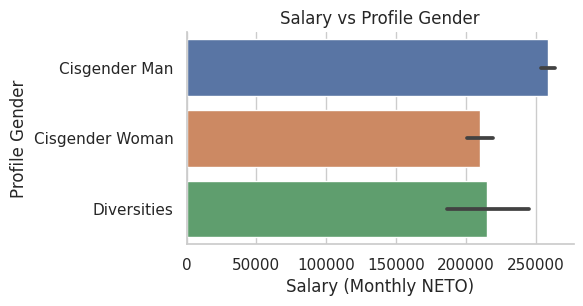

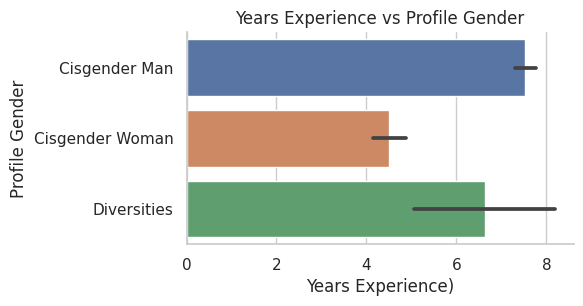

In [146]:
sns.catplot(
    data=last_df, x="salary_monthly_NETO", y="profile_gender",
    kind="bar", height=3, aspect=2)
plt.xlabel("Salary (Monthly NETO)")
plt.ylabel("Profile Gender")
plt.title("Salary vs Profile Gender")
plt.show()

sns.catplot(
    data=last_df, x="profile_years_experience", y="profile_gender",
    kind="bar", height=3, aspect=2)
plt.xlabel("Years Experience)")
plt.ylabel("Profile Gender")
plt.title("Years Experience vs Profile Gender")
plt.show()

